In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Data Load

In [2]:
iris = pd.read_csv("Iris (1).csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
print('Shape of the dataset=',iris.shape,'\n')
print('Sample rows of the dataset:\n\n',iris.head(5),'\n')
print('Statistical Summary:\n',iris.describe(),'\n')
print('Class Distribution:\n', iris.groupby('Species').size(),'\n')

Shape of the dataset= (150, 6) 

Sample rows of the dataset:

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa 

Statistical Summary:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.30

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

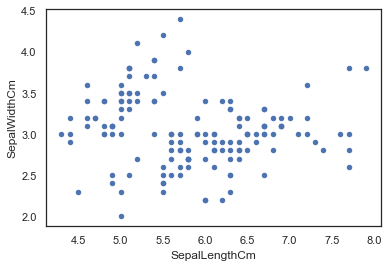

In [6]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

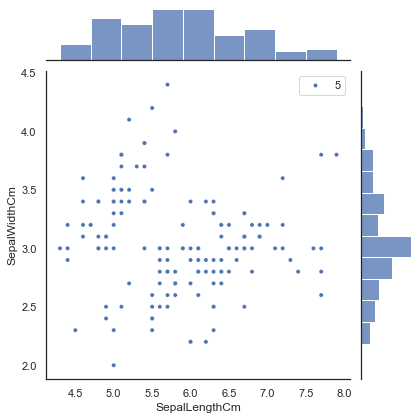

In [7]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

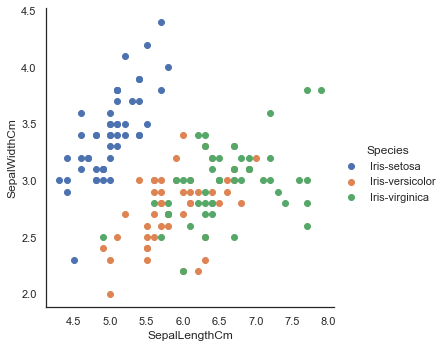

In [8]:
sns.FacetGrid(iris, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

plt.show()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

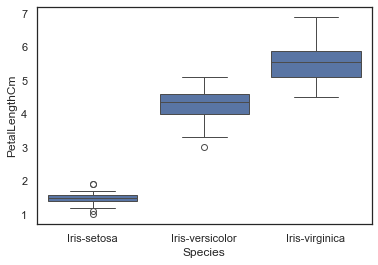

In [9]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

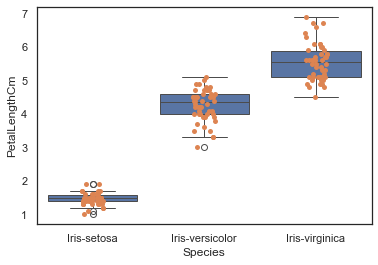

In [10]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

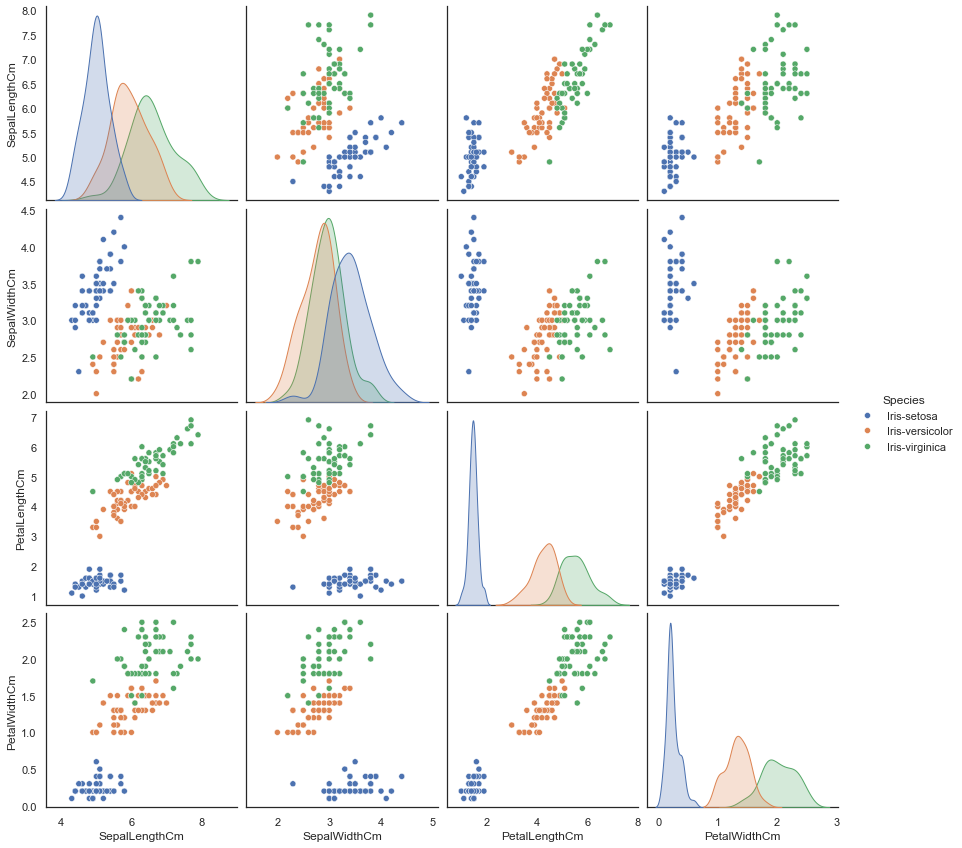

In [11]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

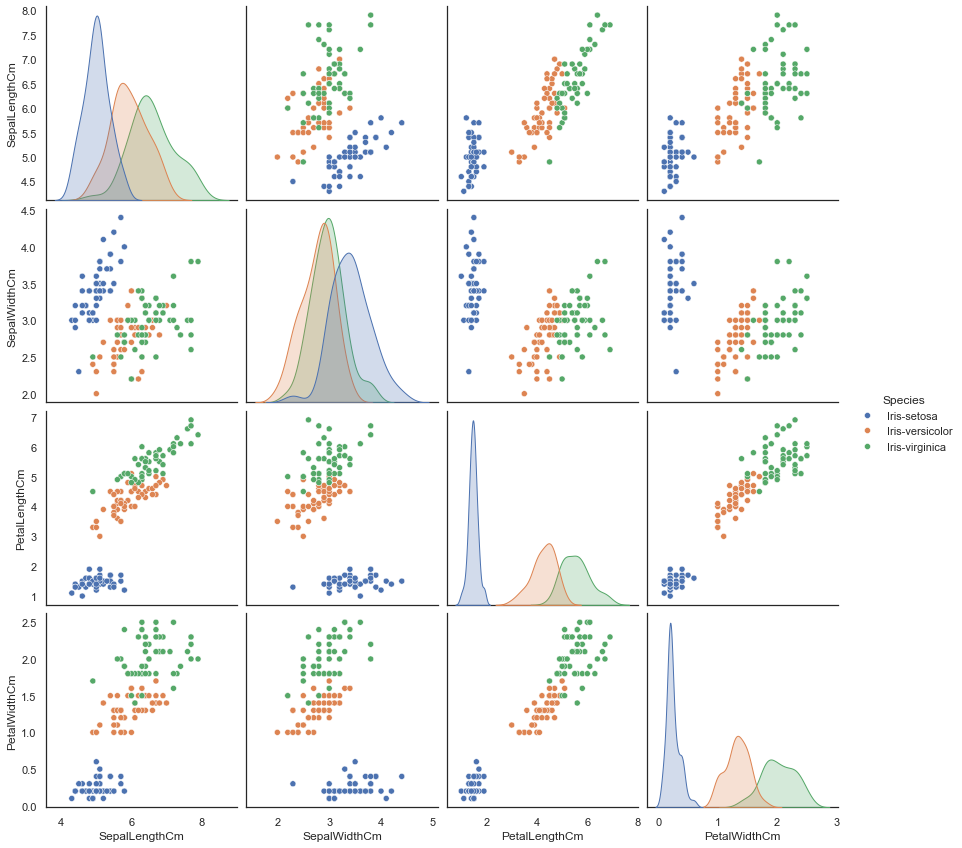

In [12]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

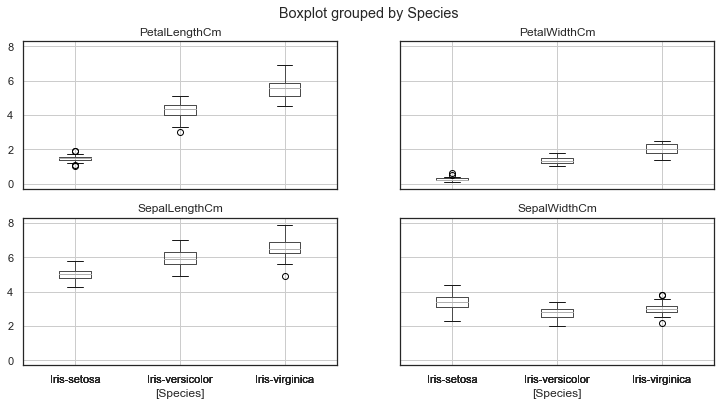

In [13]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

In [14]:
import pandas.plotting


In [15]:
from pandas.plotting import scatter_matrix


<AxesSubplot:>

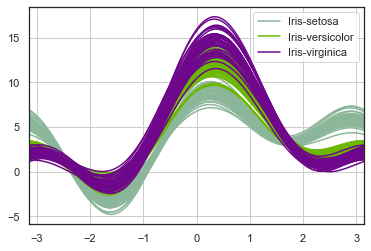

In [16]:
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

<AxesSubplot:>

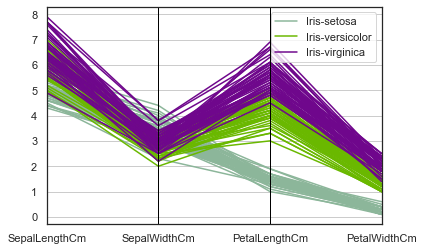

In [17]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

<AxesSubplot:>

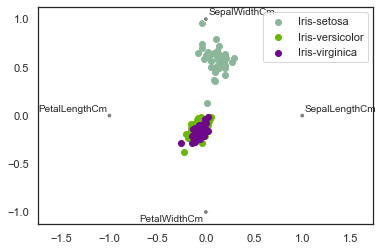

In [18]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

(array([48.,  2., 15., 37., 25., 23.]),
 array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]),
 <BarContainer object of 6 artists>)

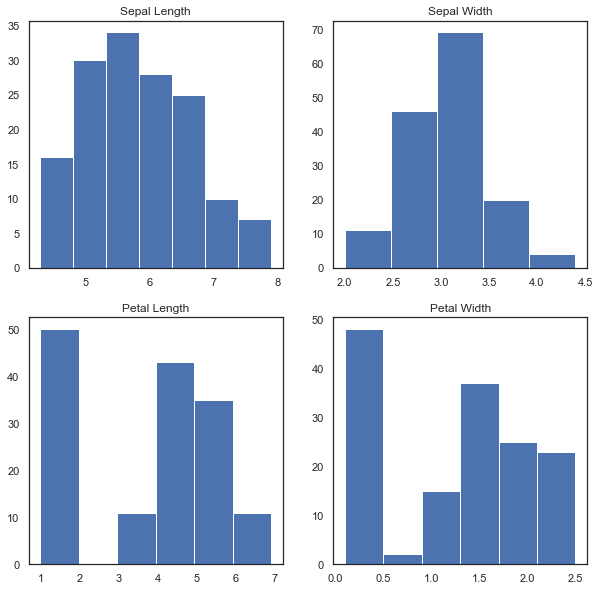

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize = (10, 10))

axes[0, 0].set_title("Sepal Length")
axes[0, 0].hist(iris['SepalLengthCm'], bins=7)

axes[0, 1].set_title("Sepal Width")
axes[0, 1].hist(iris['SepalWidthCm'], bins=5)

axes[1, 0].set_title("Petal Length")
axes[1, 0].hist(iris['PetalLengthCm'], bins=6)

axes[1, 1].set_title("Petal Width")
axes[1, 1].hist(iris['PetalWidthCm'], bins=6)

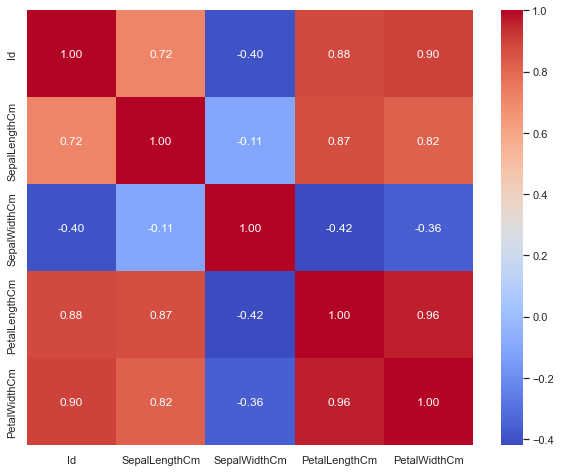

In [20]:
# Assuming df is your DataFrame
numeric_data = iris.select_dtypes(include='number')
correlation_matrix = numeric_data.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
# Split to train and test dataset
X=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y=iris[['Species']]
testsize=0.20
seed=7
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=testsize,random_state=seed)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [24]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [25]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')  
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.958333 (0.076830)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


In [26]:
import matplotlib.pyplot as plt


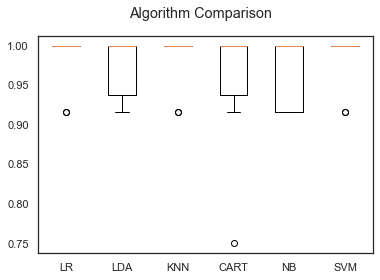

In [27]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

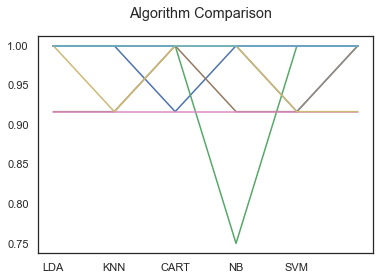

In [45]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.plot(results)
ax.set_xticklabels(names)
plt.show()

# Apply Deep Learning

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler_object = MinMaxScaler()

In [31]:
scaled_X_train = scaler_object.fit_transform(X_train)

In [32]:
scaled_X_test = scaler_object.transform(X_test) # we won't fit the test data as that would be cheating :P ;)

In [33]:
X_train.max()


SepalLengthCm    7.9
SepalWidthCm     4.4
PetalLengthCm    6.9
PetalWidthCm     2.5
dtype: float64

In [34]:
scaled_X_train.max()

1.0

In [35]:
scaled_X_train

array([[0.52777778, 0.33333333, 0.6440678 , 0.70833333],
       [0.38888889, 0.25      , 0.42372881, 0.375     ],
       [0.08333333, 0.66666667, 0.        , 0.04166667],
       [0.72222222, 0.45833333, 0.74576271, 0.83333333],
       [0.58333333, 0.375     , 0.55932203, 0.5       ],
       [0.13888889, 0.41666667, 0.06779661, 0.08333333],
       [0.33333333, 0.625     , 0.05084746, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.22222222, 0.625     , 0.06779661, 0.08333333],
       [0.77777778, 0.41666667, 0.83050847, 0.83333333],
       [0.66666667, 0.54166667, 0.79661017, 0.83333333],
       [0.69444444, 0.33333333, 0.6440678 , 0.54166667],
       [0.58333333, 0.33333333, 0.77966102, 0.875     ],
       [0.61111111, 0.41666667, 0.76271186, 0.70833333],
       [0.38888889, 0.41666667, 0.54237288, 0.45833333],
       [0.19444444, 0.54166667, 0.06779661, 0.04166667],
       [0.66666667, 0.45833333, 0.57627119, 0.54166667],
       [0.47222222, 0.08333333,

In [36]:
import keras
import tensorflow.compat.v1 as tf

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
tf.compat.v1.keras.backend.set_session(sess)

Device mapping: no known devices.



In [37]:
# Building a Sequential Keras model
from keras.models import Sequential
from keras.layers import Dense

In [38]:
# Creating a model instance and generating simple layers
model = Sequential()
model.add(Dense(16,input_dim=4, activation='relu'))
model.add(Dense(16,input_dim=4, activation='relu'))
model.add(Dense(3,activation='softmax')) 

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# Let's check the shape of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________
